In [39]:
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble

In [40]:
df = pd.read_csv('Body.csv')
df.head()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1,30,22,18,20,18,14,22,22,25,25,22,52
1,1,28,19,22,17,18,21,25,28,23,25,20,56
2,2,27,21,18,16,14,10,15,21,18,14,18,53
3,1,29,20,20,18,11,19,14,24,21,20,21,45
4,2,28,16,14,18,13,11,30,25,22,32,13,47


In [41]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(156)

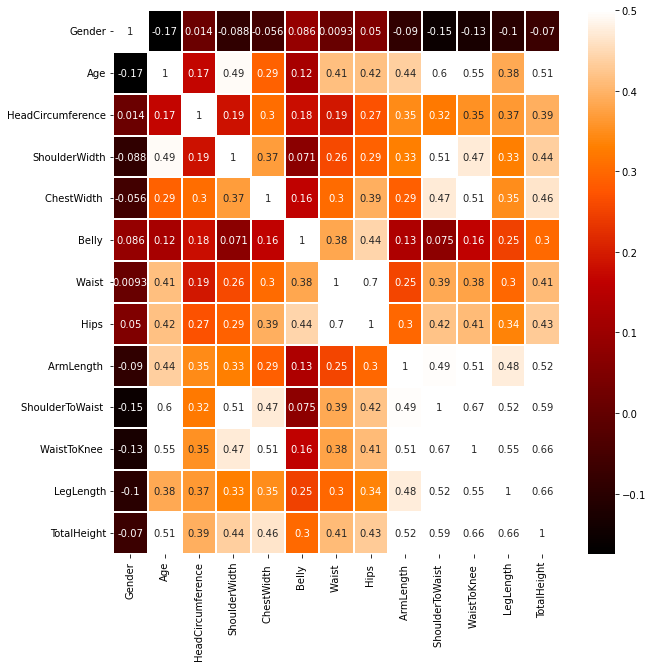

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

In [43]:
dataset = df.values
X=dataset[:,0:12]
Y=dataset[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(572, 12) (144, 12) (572,) (144,)


In [44]:
# 변형 객체 생성
minmax_scaler = MinMaxScaler()

# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train = minmax_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test = minmax_scaler.transform(X_test)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {}, RMSE : {}'.format(mse, rmse))
print('Variance score : {}'.format(r2_score(y_test, y_preds)))

MSE : 61.422807867119246, RMSE : 7.837270434731677
Variance score : 0.6267183936288006


In [47]:
print("가중치(계수, 기울기 파라미터 W) :", lr.coef_)
print("편향(절편 파라미터 b) :", lr.intercept_)

print("훈련세트 점수: {:.2f}".format( lr.score(X_train, y_train) ))
print("테스트세트 점수: {:.2f}".format( lr.score(X_test, y_test) ))

가중치(계수, 기울기 파라미터 W) : [ 0.41054204  8.05051117 14.97887231  9.8107473   9.91639101 28.45729249
 10.30496013 -4.10348627 12.51722594  5.76344687 15.50290417 20.27285376]
편향(절편 파라미터 b) : 18.025754744098137
훈련세트 점수: 0.62
테스트세트 점수: 0.63


In [48]:
lr.score(X_test, y_test)

0.6267183936288006